In [1]:
#Example European Call Option
underlying = 165
val = 165
strike = 165
days=15
tradingDayYear=365
ttm = days/tradingDayYear
rf = 0.0525 
dividend_rate = 0.0053
ivol = 0.1

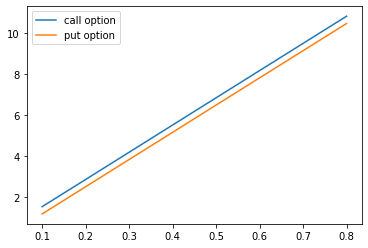

Simulated Value: 1.7642791281608672


In [2]:
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean

# Define the Black-Scholes-Merton function
def gbsm(call, underlying, strike, ttm, rf, b, ivol):
    d1 = (np.log(underlying / strike) + (b + ivol**2/2) * ttm) / (ivol * np.sqrt(ttm))
    d2 = d1 - ivol * np.sqrt(ttm)

    if call:
        return underlying * np.exp((b - rf) * ttm) * norm.cdf(d1) - strike * np.exp(-rf * ttm) * norm.cdf(d2)
    else:
        return strike * np.exp(-rf * ttm) * norm.cdf(-d2) - underlying * np.exp((b - rf) * ttm) * norm.cdf(-d1)

# Define the integral calculation function
def integral_bsm2(call, underlying, strike, days, rf, b, ivol, tradingDayYear):
    ttm = days / tradingDayYear
    dailyVol = ivol / np.sqrt(tradingDayYear)
    sigma = np.sqrt(days) * dailyVol
    mu = np.log(underlying) + ttm * b - 0.5 * sigma**2

    d = norm(loc=mu, scale=sigma)

    if call:
        def f(x):
            return max(0, x - strike) * d.pdf(x)
        val, _ = quad(f, 0, strike * 100)
    else:
        def g(x):
            return max(0, strike - x) * d.pdf(x)
        val, _ = quad(g, 0, strike * 100)

    return val * np.exp(-rf * ttm)

# Define the simulation function
def sim_bsm(underlying, strike, days, rf, b, ivol, tradingDayYear, nSim):
    ttm = days / tradingDayYear
    dailyVol = ivol / np.sqrt(tradingDayYear)
    vals = np.empty(nSim)

    d = np.random.normal(b / tradingDayYear - 0.5 * dailyVol**2, dailyVol, days)

    for sim in range(nSim):
        r = np.empty(days)
        p = underlying
        np.random.shuffle(d)
        for day in range(days):
            p *= np.exp(d[day])
        vals[sim] = max(0, p - strike)

    return mean(vals) * np.exp(-rf * ttm)

# Calculate the option values for a range of underlying values and times to maturity
vol_values = [i/10.0 for i in range(1,9)]

def replace_nan(v):
    return [0 if np.isnan(x) else x for x in v]

# Call the function to calculate the value of the call option
call_vals = [gbsm(True, val, strike, ttm, rf, rf, ivol) for ivol in vol_values]
call_vals = replace_nan(call_vals)
# Call the function to calculate the value of the call option
put_vals = [gbsm(False, val, strike, ttm, rf, rf, ivol) for ivol in vol_values]
put_vals = replace_nan(put_vals)

# Plot the results
plt.plot(vol_values, call_vals, label='call option')
plt.plot(vol_values, put_vals, label="put option")
plt.legend(loc='upper left')
plt.show()

# Calculate simulated values
nSim = 10000
sim_val = sim_bsm(underlying, strike, days, rf, rf, ivol, tradingDayYear, nSim)
print("Simulated Value:", sim_val)

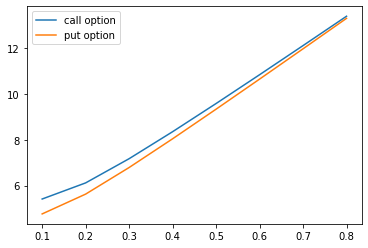

Simulated Value: 2.079592589534866


In [3]:
val = 165
strike1 = 160
strike2 = 170
# Calculate the option values for a range of underlying values and times to maturity
vol_values = [i/10.0 for i in range(1,9)]

def replace_nan(v):
    return [0 if np.isnan(x) else x for x in v]

# Call the function to calculate the value of the call option
call_vals = [gbsm(True, val, strike1, ttm, rf, rf, ivol) for ivol in vol_values]
call_vals = replace_nan(call_vals)
# Call the function to calculate the value of the call option
put_vals = [gbsm(False, val, strike2, ttm, rf, rf, ivol) for ivol in vol_values]
put_vals = replace_nan(put_vals)

# Plot the results
plt.plot(vol_values, call_vals, label='call option')
plt.plot(vol_values, put_vals, label="put option")
plt.legend(loc='upper left')
plt.show()

# Calculate simulated values
nSim = 10000
sim_val = sim_bsm(underlying, strike, days, rf, rf, ivol, tradingDayYear, nSim)
print("Simulated Value:", sim_val)

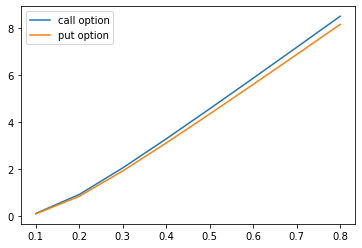

Simulated Value: 0.0


In [4]:
val = 165
strike1 = 170
strike2 = 160
# Calculate the option values for a range of underlying values and times to maturity
vol_values = [i/10.0 for i in range(1,9)]

def replace_nan(v):
    return [0 if np.isnan(x) else x for x in v]

# Call the function to calculate the value of the call option
call_vals = [gbsm(True, val, strike1, ttm, rf, dividend_rate, ivol) for ivol in vol_values]
call_vals = replace_nan(call_vals)
# Call the function to calculate the value of the call option
put_vals = [gbsm(False, val, strike2, ttm, rf, dividend_rate, ivol) for ivol in vol_values]
put_vals = replace_nan(put_vals)

# Plot the results
plt.plot(vol_values, call_vals, label='call option')
plt.plot(vol_values, put_vals, label="put option")
plt.legend(loc='upper left')
plt.show()

# Calculate simulated values
nSim = 10000
sim_val = sim_bsm(underlying, strike, days, rf, rf, ivol, tradingDayYear, nSim)
print("Simulated Value:", sim_val)